In [53]:
import os 
import time

import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import tensorflow_text as text
from tensorflow import keras

In [54]:
url = "/home/mike/Downloads/spam detection/SPAM text message 20170820 - Data.csv"

In [68]:
spam = pd.read_csv(url)

In [69]:
spam.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [70]:
text = spam.Message[np.random.randint(1)]

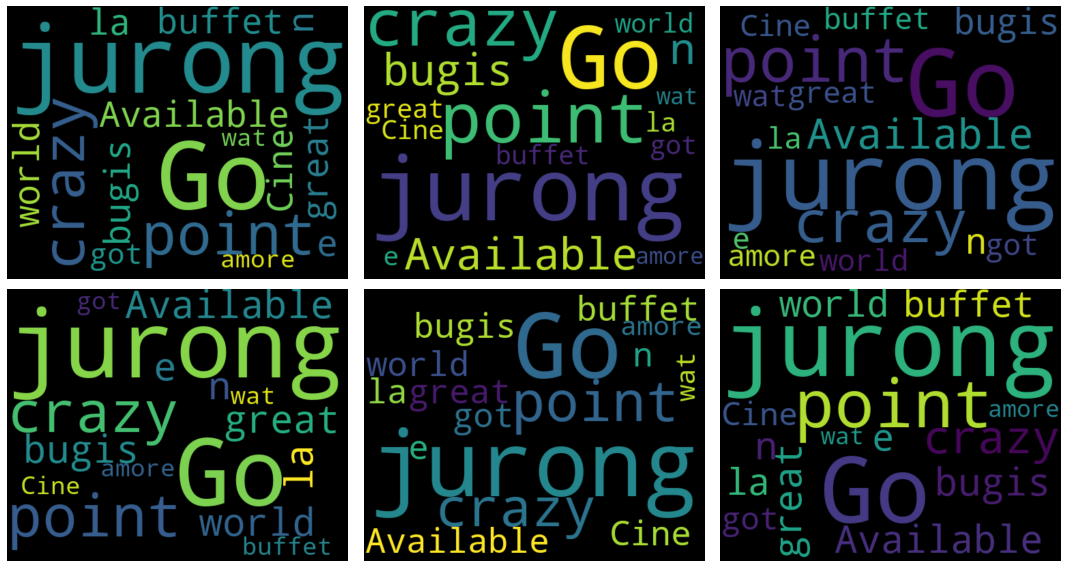

In [71]:
a = 2  # number of rows
b = 3  # number of columns
c = 1  

fig = plt.figure(figsize=(15,8))

for i in range(6):
    plt.subplot(a, b, c)
    wordcloud = WordCloud(height=400, width=500).generate(text)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    c = c + 1

plt.tight_layout()
plt.show()

/home/mike/anaconda3/envs/tensorflow/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Category', ylabel='count'>

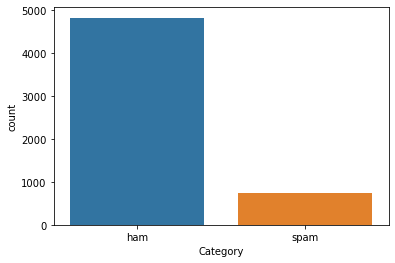

In [72]:
sns.countplot(data.Category)

In [73]:
import spacy

In [74]:
nlp = spacy.blank("en")

# Add the TextCategorizer to the empty model
textcat = nlp.add_pipe("textcat")

In [75]:
textcat.add_label("ham")
textcat.add_label("spam")

1

In [78]:
train_texts = data['Message'].values
train_labels = [{'cats': {'ham': label == 'ham',
                          'spam': label == 'spam'}} 
                for label in spam['Category']]

In [79]:
train_data = list(zip(train_texts, train_labels))
train_data[:3]

[('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
  {'cats': {'ham': True, 'spam': False}}),
 ('Ok lar... Joking wif u oni...', {'cats': {'ham': True, 'spam': False}}),
 ("Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
  {'cats': {'ham': False, 'spam': True}})]

In [80]:
from spacy.util import minibatch
from spacy.training.example import Example

spacy.util.fix_random_seed(1)
optimizer = nlp.begin_training()

# Create the batch generator with batch size = 8
batches = minibatch(train_data, size=8)
# Iterate through minibatches
for batch in batches:
    # Each batch is a list of (text, label) 
    for text, labels in batch:
        doc = nlp.make_doc(text)
        example = Example.from_dict(doc, labels)
        nlp.update([example], sgd=optimizer)

In [81]:
texts = ["Are you ready for the tea party????? It's gonna be wild",
         "URGENT Reply to this message for GUARANTEED FREE TEA" ]
docs = [nlp.tokenizer(text) for text in texts]
    
# Use textcat to get the scores for each doc
textcat = nlp.get_pipe('textcat')
scores = textcat.predict(docs)

print(scores)

[[9.9963629e-01 3.6373362e-04]
 [2.2497526e-03 9.9775022e-01]]


In [82]:
texts = ["Are you ready for the tea party????? It's gonna be wild",
         "URGENT Reply to this message for GUARANTEED FREE TEA" ]
docs = [nlp.tokenizer(text) for text in texts]
    
# Use textcat to get the scores for each doc
textcat = nlp.get_pipe('textcat')
scores = textcat.predict(docs)

print(scores)

[[9.9963629e-01 3.6373362e-04]
 [2.2497526e-03 9.9775022e-01]]
